In [234]:
# import libraries
from urllib.request import urlopen as ureq
from bs4 import BeautifulSoup as soup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Critic Ratings from The A.V. Club

In [235]:
# get html (avclub)
url = "https://www.avclub.com/c/tv-review/brooklyn-nine-nine?startTime=1511319600497"
uclient = ureq(url)
page_html = uclient.read()
uclient.close()

In [236]:
# get articles on page (avclub)
page_soup = soup(page_html,"html.parser")
articles = page_soup.findAll("article",{"class":"js_post_item cw4lnv-0 glgzMx"})

In [237]:
# check if any articles are fetched i.e. len(articles)>0
len(articles)

20

In [238]:
# store article rating and date in a pandas dataframe (av_club_b99)
column_names = ['episode_air_date','episode_rating']
av_club_b99 = pd.DataFrame(columns=column_names)
for article in articles:
    av_club_b99 = av_club_b99.append({'episode_rating': article.figure.div.div.text, 'episode_air_date': article.div.findAll("div",{"class":"sc-3nbvzd-1 VhErj"})[0].text}, ignore_index=True)
av_club_b99['episode_air_date'] = pd.to_datetime(av_club_b99['episode_air_date'])
av_club_b99.head()

,episode_air_date,episode_rating
0,2017-11-15,B-
1,2017-11-07,B+
2,2017-10-17,A
3,2017-10-10,B+
4,2017-10-03,C+


In [239]:
# testing code for fetching all articles instead of just the first 20
from selenium import webdriver
url = 'https://www.avclub.com/c/tv-review/brooklyn-nine-nine?startTime=1511319600497'
driver = webdriver.Chrome('C:/Users/Jagruti Joshi/Downloads/Installation Files/chromedriver_win32/chromedriver.exe')
driver.get(url)
for elem in driver.find_elements_by_link_text('More stories'):
        try:
            elem.click()
            print('Succesful click')
        except:
            print('Unsuccesful click')

source = driver.page_source

driver.close()

Succesful click


### User Ratings from IMDB

In [240]:
# get html (imdb)
url = "https://www.imdb.com/title/tt2467372/episodes?season=5"
uclient = ureq(url)
page_html = uclient.read()
uclient.close()

In [241]:
# get episode data on page (imdb)
page_soup = soup(page_html,"html.parser")
episodes = page_soup.findAll("div",{"class":"info"})

In [242]:
# check if any episode data is fetched i.e. len(episodes)>0
len(episodes)

22

In [243]:
# store episode name, date, total votes and rating in a pandas dataframe (imdb_b99)
column_names = ['episode_air_date','episode_rating','episode_name','total_votes']
imdb_b99 = pd.DataFrame(columns=column_names)
for episode in episodes:
    imdb_b99 = imdb_b99.append({'episode_air_date': episode.findAll("div",{"class":"airdate"})[0].text, 'episode_rating': episode.findAll("span",{"class":"ipl-rating-star__rating"})[0].text, 'episode_name':episode.a['title'],'total_votes':episode.findAll("span",{"class":"ipl-rating-star__total-votes"})[0].text}, ignore_index=True)
imdb_b99['episode_air_date'] = pd.to_datetime(imdb_b99['episode_air_date'].replace('\n', '').str.strip())
imdb_b99['total_votes'] = pd.to_numeric(imdb_b99['total_votes'].str[1:6].str.replace(',',''))
imdb_b99.head()

,episode_air_date,episode_rating,episode_name,total_votes
0,2017-09-26,8.5,The Big House Pt. 1,1664
1,2017-10-03,8.4,The Big House Pt. 2,1507
2,2017-10-10,8.0,Kicks,1383
3,2017-10-17,9.5,HalloVeen,3028
4,2017-11-07,8.0,Bad Beat,1356


### Combining Ratings from The A.V. Club and IMDB

In [244]:
av_club_imdb_b99 = pd.merge(av_club_b99, imdb_b99, on='episode_air_date')
av_club_imdb_b99.head()

,episode_air_date,episode_rating_x,episode_rating_y,episode_name,total_votes
0,2017-11-07,B+,8.0,Bad Beat,1356
1,2017-10-17,A,9.5,HalloVeen,3028
2,2017-10-10,B+,8.0,Kicks,1383
3,2017-10-03,C+,8.4,The Big House Pt. 2,1507
4,2017-09-26,B,8.5,The Big House Pt. 1,1664


In [245]:
column_names = ['rating_letter','rating_num']
data = [['A',10], ['A-',9], ['B+',8], ['B',7], ['B-',6], ['C+',5], ['C',4], ['C-',3], ['D+',2], ['D',1]]
av_club_rating = pd.DataFrame(data,columns = column_names)
av_club_rating.head()

,rating_letter,rating_num
0,A,10
1,A-,9
2,B+,8
3,B,7
4,B-,6


In [246]:
av_club_imdb_b99 = pd.merge(av_club_imdb_b99, av_club_rating, left_on='episode_rating_x',right_on='rating_letter')
av_club_imdb_b99.head()

,episode_air_date,episode_rating_x,episode_rating_y,episode_name,total_votes,rating_letter,rating_num
0,2017-11-07,B+,8.0,Bad Beat,1356,B+,8
1,2017-10-10,B+,8.0,Kicks,1383,B+,8
2,2017-10-17,A,9.5,HalloVeen,3028,A,10
3,2017-10-03,C+,8.4,The Big House Pt. 2,1507,C+,5
4,2017-09-26,B,8.5,The Big House Pt. 1,1664,B,7


In [247]:
av_club_imdb_b99 = av_club_imdb_b99.rename(columns={'rating_num':'episode_rating_av_club','episode_rating_y':'episode_rating_imdb','total_votes':'total_votes_imdb'})
av_club_imdb_b99 = av_club_imdb_b99[['episode_name','episode_air_date','episode_rating_imdb','total_votes_imdb','episode_rating_av_club']]
av_club_imdb_b99

,episode_name,episode_air_date,episode_rating_imdb,total_votes_imdb,episode_rating_av_club
0,Bad Beat,2017-11-07,8.0,1356,8
1,Kicks,2017-10-10,8.0,1383,8
2,HalloVeen,2017-10-17,9.5,3028,10
3,The Big House Pt. 2,2017-10-03,8.4,1507,5
4,The Big House Pt. 1,2017-09-26,8.5,1664,7


### Exploratory Data Analysis

#### IMDB Votes vs IMDB Ratings

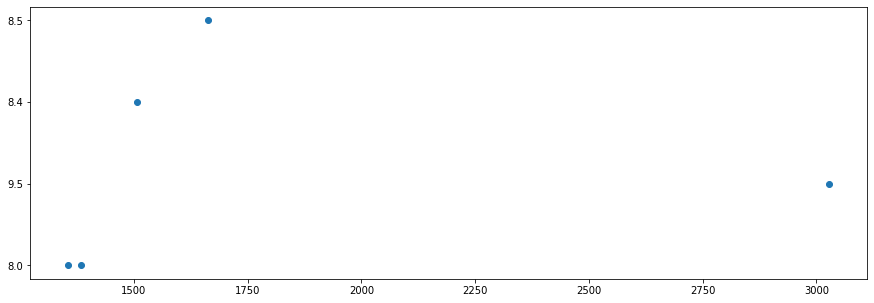

In [248]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

ax.scatter('total_votes_imdb','episode_rating_imdb',data=av_club_imdb_b99)

#### Episode Ratings: IMDB vs The A.V. Club

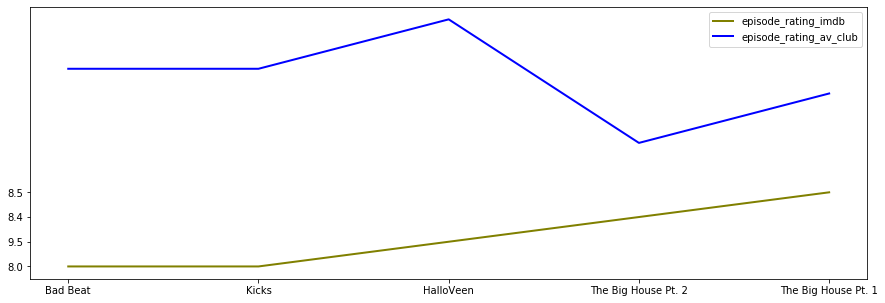

In [252]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

plt.plot( 'episode_name', 'episode_rating_imdb', data=av_club_imdb_b99, marker='', color='olive', linewidth=2)
plt.plot( 'episode_name', 'episode_rating_av_club', data=av_club_imdb_b99, marker='', color='blue', linewidth=2)
plt.legend()